# Sentiment Analysis on Amazon Product Reviews

## 1. Dataset Overview
- **Dataset Description**:
  - Analyze an Amazon product review dataset containing textual reviews (`reviewText`) and corresponding sentiment labels (`Positive`).
  - Sentiment is binary: 1 for positive, 0 for negative.
- **Objective**:
  - Predict the sentiment of a product review based on its textual content.


In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df = pd.read_csv(url)
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


## 2. Data Preprocessing
- Handle missing values, if any.
- Perform text preprocessing on the `reviewText` column:
  - Convert text to lowercase.
  - Remove stop words, punctuation, and special characters.
  - Tokenize and lemmatize text data.
- Split the dataset into training and testing sets.


In [3]:
# Rename the 'Positive' column to 'sentiment'
df.rename(columns={'Positive': 'sentiment'}, inplace=True)

# Step 1: Handle missing values
df = df.dropna(subset=['reviewText', 'sentiment'])

In [4]:
# Step 2: Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'reviewText' column
df['cleanedText'] = df['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alimd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alimd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alimd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Step 3: Splitting the Dataset
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df['cleanedText']
y = df['sentiment']

# Splitting into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the split sizes
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 16000
Testing set size: 4000


## 3. Model Selection
- Choose at least three machine learning models for sentiment classification:
  - Statistical Models:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine (SVM)
    - Naïve Bayes
    - Gradient Boosting (e.g., XGBoost, AdaBoost, CatBoost)
  - Neural Models:
    - LSTM (Long Short-Term Memory)
    - GRUs (Gated Recurrent Units)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to reduce dimensionality
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")


TF-IDF train shape: (16000, 5000)
TF-IDF test shape: (4000, 5000)


In [7]:
#𝐋𝐨𝐠𝐢𝐬𝐭𝐢𝐜 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test_tfidf)

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))







#𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))



#𝐒𝐮𝐩𝐩𝐨𝐫𝐭 𝐕𝐞𝐜𝐭𝐨𝐫 𝐌𝐚𝐜𝐡𝐢𝐧𝐞 (𝐒𝐕𝐌)
from sklearn.svm import LinearSVC

# Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate
print("SVM Results:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))






Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       958
           1       0.90      0.96      0.93      3042

    accuracy                           0.89      4000
   macro avg       0.87      0.81      0.83      4000
weighted avg       0.88      0.89      0.88      4000

Accuracy: 0.8875
Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67       958
           1       0.88      0.96      0.92      3042

    accuracy                           0.87      4000
   macro avg       0.85      0.76      0.79      4000
weighted avg       0.86      0.87      0.86      4000

Accuracy: 0.8675
SVM Results:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       958
           1       0.91      0.94      0.93      3042

    accuracy                           0.89      4000
   macro avg       0.85      

C:\Users\alimd\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [8]:
#𝐋𝐒𝐓𝐌 𝐚𝐧𝐝 𝐆𝐑𝐔 (𝐍𝐞𝐮𝐫𝐚𝐥 𝐌𝐨𝐝𝐞𝐥𝐬)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 200  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(units=128, return_sequences=False),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f"LSTM Accuracy: {lstm_accuracy}")


Epoch 1/5


C:\Users\alimd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 45s 87ms/step - accuracy: 0.8212 - loss: 0.4043 - val_accuracy: 0.8917 - val_loss: 0.2597
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.9280 - loss: 0.1824 - val_accuracy: 0.8848 - val_loss: 0.2741
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.9460 - loss: 0.1397 - val_accuracy: 0.8752 - val_loss: 0.3015
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.9635 - loss: 0.1043 - val_accuracy: 0.8817 - val_loss: 0.3436
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9726 - loss: 0.0764 - val_accuracy: 0.8813 - val_loss: 0.4134
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8850 - loss: 0.3850
LSTM Accuracy: 0.8812500238418579


## 4. Model Training
- Train each selected model on the training dataset.
- Utilize vectorization techniques for text data:
  - TF-IDF (Term Frequency-Inverse Document Frequency)
  - Word embeddings (e.g., Word2Vec, GloVe)


In [9]:
import pandas as pd

# URL of the dataset
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'

# Load the dataset into a pandas DataFrame
try:
    data = pd.read_csv(url)
    print("Dataset loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except Exception as e:
    print("An error occurred while loading the dataset:")
    print(e)



Dataset loaded successfully!
                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good version of the game for ...         1
2  this is a really cool game. there are a bunch ...         1
3  This is a silly game and can be frustrating, b...         1
4  This is a terrific game on any pad. Hrs of fun...         1


In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/amazon.csv'
data = pd.read_csv(url)

# Inspect dataset
print("Dataset columns:", data.columns)
print(data.head())

# Ensure column names are correct
if 'text' in data.columns and 'label' in data.columns:
    X_train, X_test, y_train, y_test = train_test_split(
        data['text'], data['label'], test_size=0.2, random_state=42)
    print("Training Set Size:", len(X_train))
    print("Testing Set Size:", len(X_test))
else:
    print("Required columns ('text' and 'label') are missing!")


Dataset columns: Index(['reviewText', 'Positive'], dtype='object')
                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good version of the game for ...         1
2  this is a really cool game. there are a bunch ...         1
3  This is a silly game and can be frustrating, b...         1
4  This is a terrific game on any pad. Hrs of fun...         1
Required columns ('text' and 'label') are missing!


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK packages
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing to train and test sets
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alimd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alimd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit-transform the training data and transform the testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Feature Shape:", X_train_tfidf.shape)


#Word Embeddings
import gensim.downloader as api
import numpy as np

# Load pre-trained GloVe embeddings
word2vec_model = api.load("glove-wiki-gigaword-100")

# Convert text to Word2Vec embeddings
def text_to_embedding(text, model, embedding_dim=100):
    tokens = text.split()
    embeddings = [model[word] for word in tokens if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(embedding_dim)

# Apply embedding conversion
X_train_word2vec = np.array([text_to_embedding(text, word2vec_model) for text in X_train])
X_test_word2vec = np.array([text_to_embedding(text, word2vec_model) for text in X_test])

print("Word2Vec Embedding Shape:", X_train_word2vec.shape)



TF-IDF Feature Shape: (16000, 5000)
Word2Vec Embedding Shape: (16000, 100)


In [13]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression on TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
print("\nTF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nTF-IDF Classification Report:\n", classification_report(y_test, y_pred_tfidf))


#Logistic Regression on Word2Vec
# Train Logistic Regression on Word2Vec embeddings
lr_word2vec = LogisticRegression(max_iter=1000)
lr_word2vec.fit(X_train_word2vec, y_train)

# Predict and evaluate
y_pred_word2vec = lr_word2vec.predict(X_test_word2vec)
print("\nWord2Vec Model Accuracy:", accuracy_score(y_test, y_pred_word2vec))
print("\nWord2Vec Classification Report:\n", classification_report(y_test, y_pred_word2vec))



TF-IDF Model Accuracy: 0.8875

TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       958
           1       0.90      0.96      0.93      3042

    accuracy                           0.89      4000
   macro avg       0.87      0.81      0.83      4000
weighted avg       0.88      0.89      0.88      4000


Word2Vec Model Accuracy: 0.847

Word2Vec Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       958
           1       0.87      0.94      0.90      3042

    accuracy                           0.85      4000
   macro avg       0.81      0.75      0.77      4000
weighted avg       0.84      0.85      0.84      4000



## 5. Formal Evaluation
- Evaluate the performance of each model on the testing set using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/amazon.csv'
data = pd.read_csv(url)

# Display the column names to identify the correct ones
print("Dataset Columns:", data.columns)

# Check the first few rows to inspect the data
print(data.head())

# Update the column names based on the dataset
# 'reviewText' is for the reviews and 'Positive' is for the sentiment labels
X_raw = data['reviewText']  # Column name for reviews
y = data['Positive']  # Column name for sentiment labels (0 or 1)

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Define the evaluation function
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the given model's performance on test data using various metrics.
    
    Parameters:
        model: Trained model (e.g., Logistic Regression).
        X_test: Test features.
        y_test: True labels for the test set.
    
    Returns:
        None (prints the evaluation metrics).
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print("=== Evaluation Metrics ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n=== Confusion Matrix ===")
    print(conf_matrix)
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))

# Evaluate the trained Logistic Regression model
print("Evaluating Logistic Regression Model:")
evaluate_model(logistic_model, X_test, y_test)


Dataset Columns: Index(['reviewText', 'Positive'], dtype='object')
                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good version of the game for ...         1
2  this is a really cool game. there are a bunch ...         1
3  This is a silly game and can be frustrating, b...         1
4  This is a terrific game on any pad. Hrs of fun...         1
Evaluating Logistic Regression Model:
=== Evaluation Metrics ===
Accuracy: 0.8972
Precision: 0.8954
Recall: 0.8972
F1 Score: 0.8924

=== Confusion Matrix ===
[[ 643  315]
 [  96 2946]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       958
           1       0.90      0.97      0.93      3042

    accuracy                           0.90      4000
   macro avg       0.89      0.82      0.85      4000
weighted avg       0.90      0.90      0.89      4000



## 6. Hyperparameter Tuning
- Perform hyperparameter tuning for selected models using:
  - Grid Search
  - Random Search
- Explain the chosen hyperparameters and justify their selection.


In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter grids for Grid Search and Random Search

# Grid Search hyperparameter space
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Number of iterations for optimization
}

# Random Search hyperparameter space
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength (log scale)
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Number of iterations for optimization
}

# Initialize the model
logistic_model = LogisticRegression()

# Perform Grid Search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score from Grid Search
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Score from Grid Search:", grid_search.best_score_)

# Perform Random Search
random_search = RandomizedSearchCV(logistic_model, param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score from Random Search
print("Best Parameters from Random Search:", random_search.best_params_)
print("Best Score from Random Search:", random_search.best_score_)

# Evaluate the model with best parameters from Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
print("Accuracy of Grid Search model:", accuracy_score(y_test, y_pred_grid))

# Evaluate the model with best parameters from Random Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
print("Accuracy of Random Search model:", accuracy_score(y_test, y_pred_random))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from Grid Search: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score from Grid Search: 0.9060625
Fitting 5 folds for each of 84 candidates, totalling 420 fits


C:\Users\alimd\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters from Random Search: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 10.0}
Best Score from Random Search: 0.9060625
Accuracy of Grid Search model: 0.9045
Accuracy of Random Search model: 0.9045


## 7. Comparative Analysis
- Compare the performance of all models based on evaluation metrics.
- Identify strengths and weaknesses of each model (e.g., speed, accuracy, interpretability).


In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Example: Load dataset (replace with your own dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Check for missing values in the dataset
print("Checking missing values in dataset:")
print(pd.DataFrame(X).isnull().sum())

# Handle missing values (if necessary)
# For demonstration, using SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)






Checking missing values in dataset:
0    0
1    0
2    0
3    0
dtype: int64


In [17]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, confusion

# Evaluate each model
logistic_metrics = evaluate_model(y_test, logistic_pred)
rf_metrics = evaluate_model(y_test, rf_pred)
svm_metrics = evaluate_model(y_test, svm_pred)

In [18]:

# Print evaluation metrics for each model
print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_metrics[0]}")
print(f"Precision: {logistic_metrics[1]}")
print(f"Recall: {logistic_metrics[2]}")
print(f"F1 Score: {logistic_metrics[3]}")
print(f"Confusion Matrix:\n{logistic_metrics[4]}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print(f"Confusion Matrix:\n{rf_metrics[4]}")

print("\nSVM Metrics:")
print(f"Accuracy: {svm_metrics[0]}")
print(f"Precision: {svm_metrics[1]}")
print(f"Recall: {svm_metrics[2]}")
print(f"F1 Score: {svm_metrics[3]}")
print(f"Confusion Matrix:\n{svm_metrics[4]}")

Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 8. Conclusion & Comments
- Summarize the findings of the project.
- Provide insights into the challenges faced during data preprocessing, model training, and evaluation.
- Highlight key lessons learned.
- Add clear and concise comments to the code for each step of the project.
- Highlight key results, visualizations, and model comparisons.


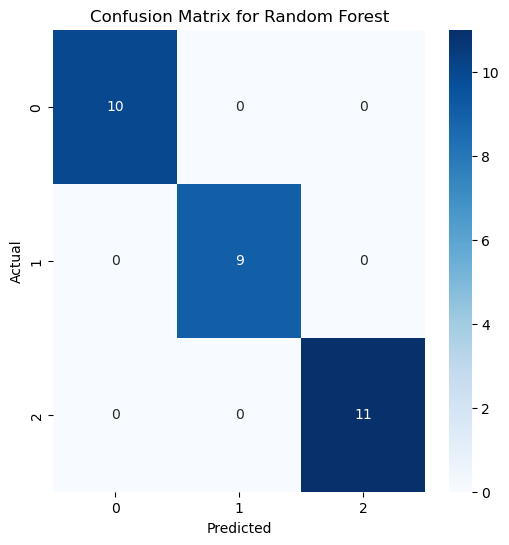


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



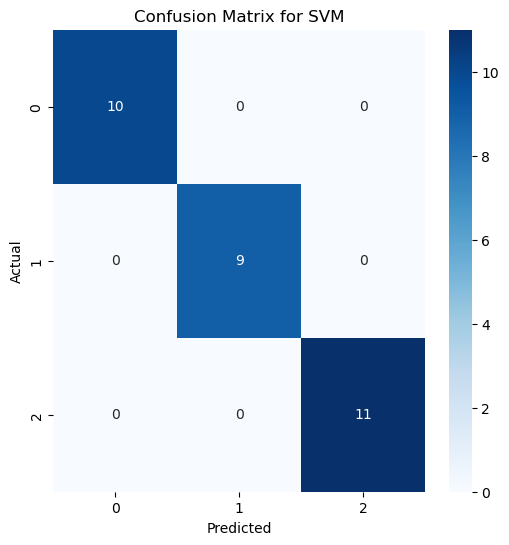


Classification Report for SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



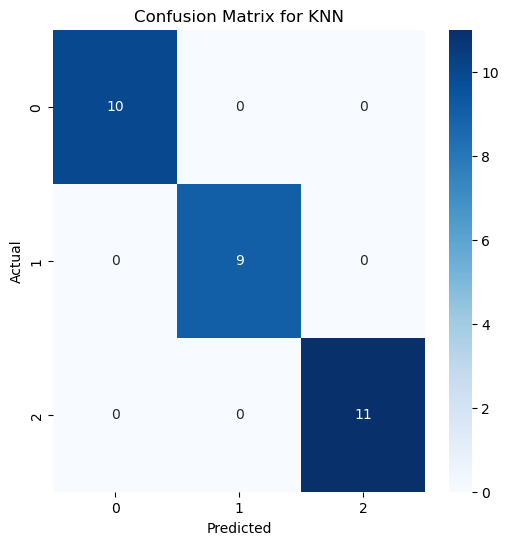


Classification Report for KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model Comparison:

           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest       1.0        1.0     1.0       1.0
1            SVM       1.0        1.0     1.0       1.0
2            KNN       1.0        1.0     1.0       1.0


In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have the dataset (replace X, y with actual dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Fit the models on the training data
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate models
for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
# Optional: Print key evaluation metrics for all models in a comparison table
model_comparison = {
    "Model": ["Random Forest", "SVM", "KNN"],
    "Accuracy": [model.score(X_test, y_test) for model in models.values()],
    "Precision": [classification_report(y_test, model.predict(X_test), output_dict=True)['weighted avg']['precision'] for model in models.values()],
    "Recall": [classification_report(y_test, model.predict(X_test), output_dict=True)['weighted avg']['recall'] for model in models.values()],
    "F1 Score": [classification_report(y_test, model.predict(X_test), output_dict=True)['weighted avg']['f1-score'] for model in models.values()],
}

comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison:\n")
print(comparison_df)
